In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

print("===============================================")
print("   INICIANDO PIPELINE COMPLETO DO PROJETO OLIST")
print("===============================================\n")

   INICIANDO PIPELINE COMPLETO DO PROJETO OLIST



In [ ]:
# ============================================================
# 0. CARREGAMENTO DOS DADOS
# ============================================================

print("Carregando datasets obrigatórios (3 arquivos CSV)...")

orders = pd.read_csv("olist_orders_dataset.csv")
items = pd.read_csv("olist_order_items_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")

# Merge principal
df = orders.merge(items, on="order_id", how="left")
df = df.merge(products, on="product_id", how="left")

print("Dataset unificado carregado com sucesso!")
print("Formato:", df.shape)
print("-"*50)

Carregando datasets obrigatórios (3 arquivos CSV)...
Dataset unificado carregado com sucesso!
Formato: (113425, 22)
--------------------------------------------------


In [ ]:
# ============================================================
# 1. ANÁLISE EXPLORATÓRIA (EDA) – TABELAS
# ============================================================

print("\n1) Tipos iniciais do DataFrame:")
print(df.dtypes)
print("-"*50)

print("\n2) Valores Nulos por Coluna:")
print(df.isnull().sum())
print("-"*50)

print("\n3) Duplicatas no dataset:")
print(df.duplicated().sum())
print("-"*50)

print("\n4) Estatísticas Descritivas:")
print(df.describe(include='all'))
print("-"*50)


1) Tipos iniciais do DataFrame:
order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
dtype: object
--------------------------------------------------


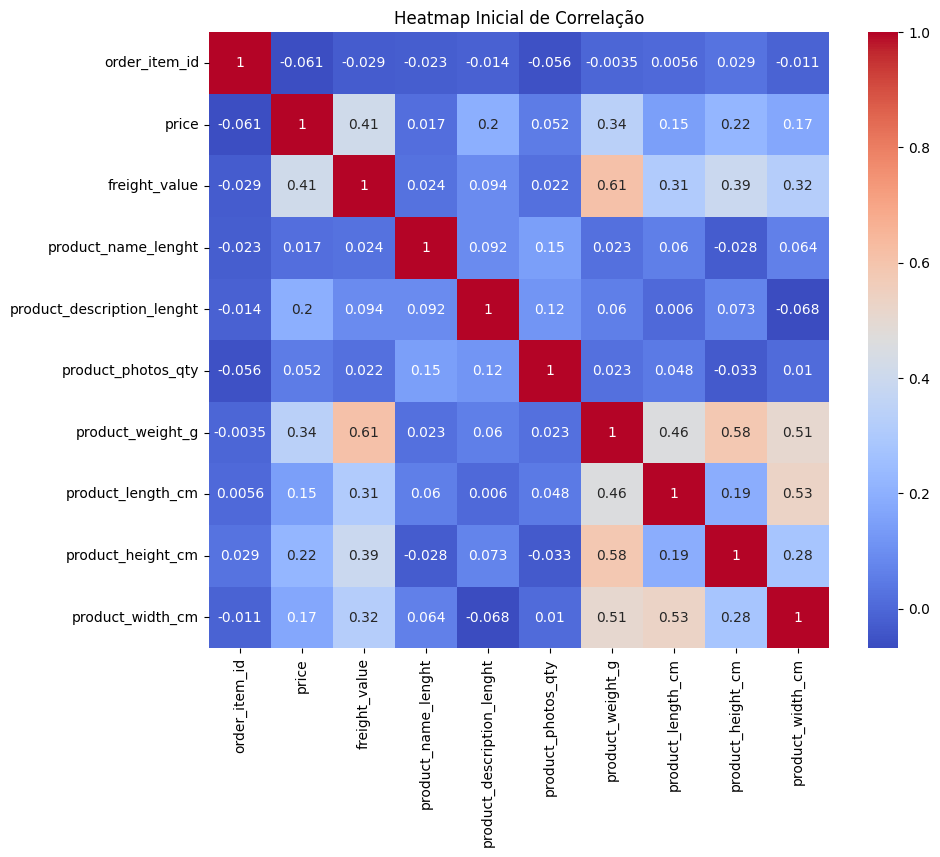

In [ ]:
# ============================================================
# 1. ANÁLISE EXPLORATÓRIA (EDA) – GRÁFICOS (Correlação)
# ============================================================

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['float64','int64']).corr(),
            annot=True, cmap='coolwarm')
plt.title("Heatmap Inicial de Correlação")
plt.show()


5) Distribuição COMPLETA do Preço (Histograma, KDE, Boxplot, Q-Q Plot)



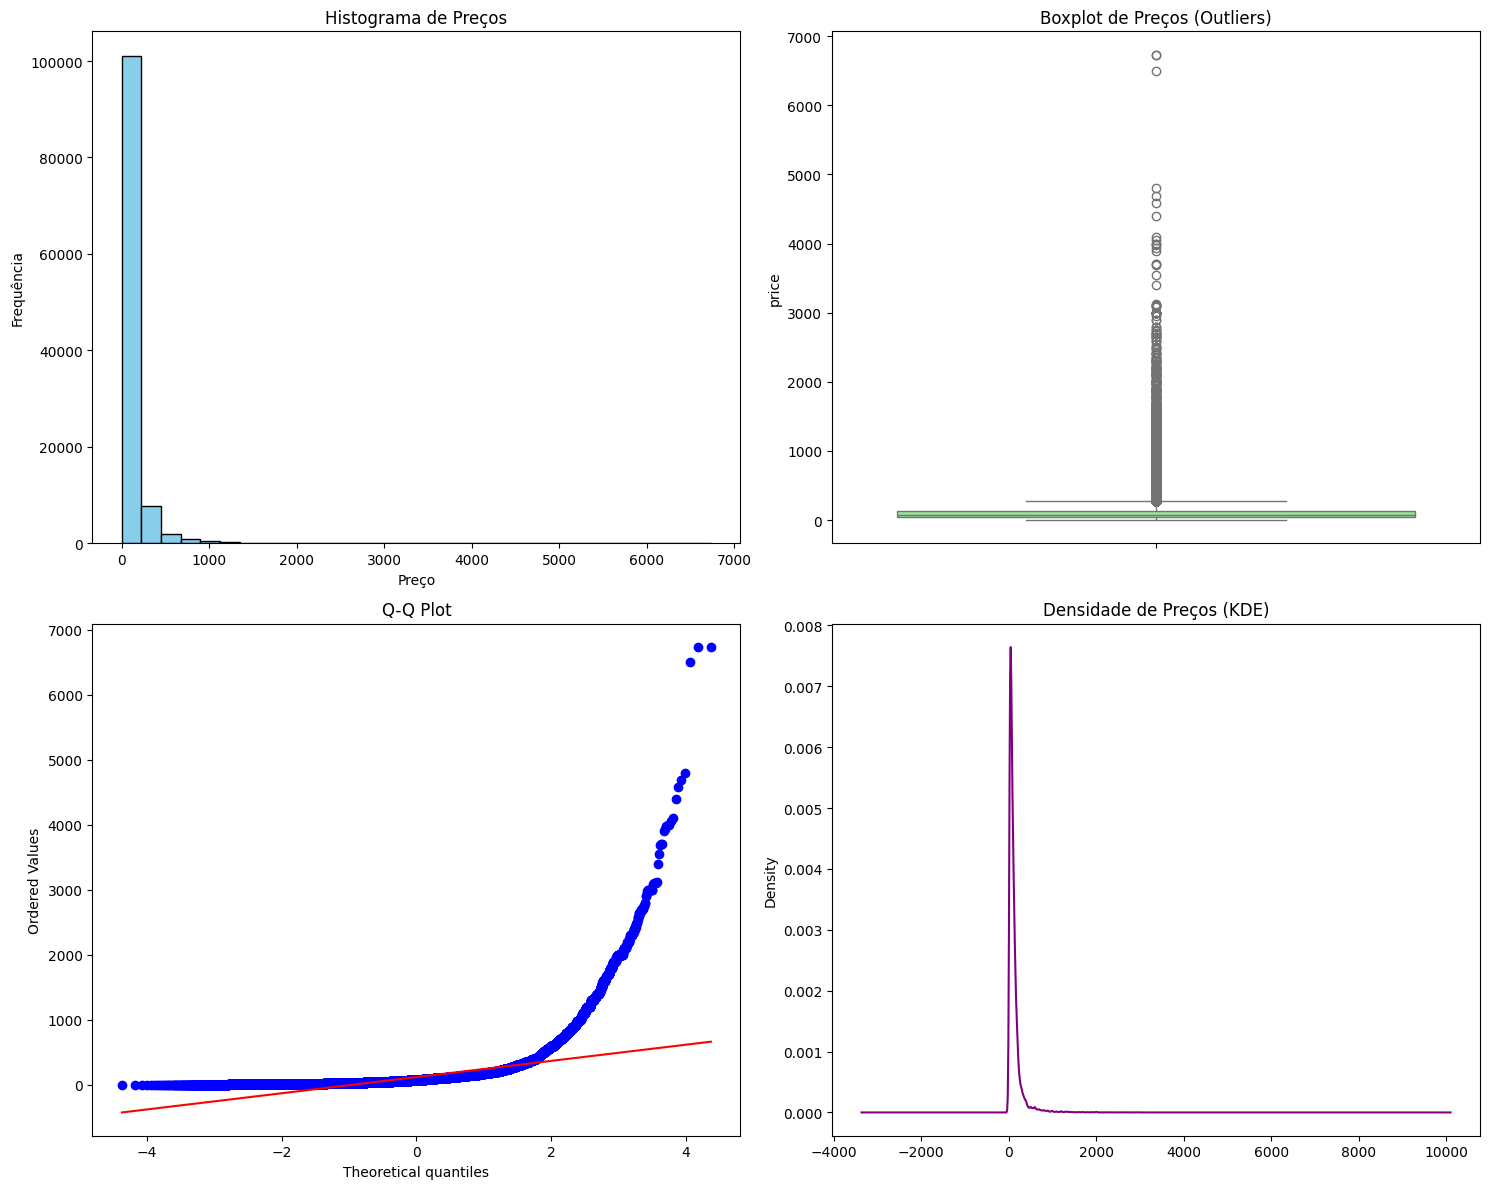

In [ ]:
# ============================================================
# 1. ANÁLISE EXPLORATÓRIA (EDA) – GRÁFICOS (Distribuição de Preços)
# ============================================================

if 'price' in df.columns:
    print("\n5) Distribuição COMPLETA do Preço (Histograma, KDE, Boxplot, Q-Q Plot)\n")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    axes[0][0].hist(df['price'].dropna(), bins=30,
                    color='skyblue', edgecolor='black')
    axes[0][0].set_title("Histograma de Preços")
    axes[0][0].set_xlabel("Preço")
    axes[0][0].set_ylabel("Frequência")

    sns.boxplot(y=df['price'], ax=axes[0][1], color='lightgreen')
    axes[0][1].set_title("Boxplot de Preços (Outliers)")

    stats.probplot(df['price'].dropna(), dist="norm", plot=axes[1][0])
    axes[1][0].set_title("Q-Q Plot")

    df['price'].plot(kind='density', ax=axes[1][1], color='purple')
    axes[1][1].set_title("Densidade de Preços (KDE)")

    plt.tight_layout()
    plt.show()

In [ ]:
def tratar_tipos_e_nulos(df):
    print("\n===================================================")
    print("2. TRATAMENTO DE TIPOS, NULOS, DUPLICATAS E ERROS")
    print("===================================================\n")

    df_clean = df.copy()

    print("NULOS ANTES:")
    print(df_clean.isnull().sum())
    print("-"*50)

    col_datas = [
        'order_purchase_timestamp','order_approved_at',
        'order_delivered_carrier_date','order_delivered_customer_date',
        'order_estimated_delivery_date','shipping_limit_date'
    ]

    for col in col_datas:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

    print("Duplicatas removidas:", df_clean.duplicated().sum())
    df_clean.drop_duplicates(inplace=True)

    df_clean.dropna(subset=['product_id','seller_id','price','freight_value'], inplace=True)

    df_clean['product_category_name'] = df_clean['product_category_name'].fillna('desconhecido')

    df_clean[['product_description_lenght','product_name_lenght','product_photos_qty']] = \
        df_clean[['product_description_lenght','product_name_lenght','product_photos_qty']].fillna(0)

    cols_dim = ['product_width_cm','product_height_cm','product_length_cm','product_weight_g']
    for c in cols_dim:
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())

    print("\nNULOS DEPOIS:")
    print(df_clean.isnull().sum())
    print("-"*50)

    return df_clean

In [1]:
# ============================================================
#  BOXPlot ANTES da limpeza de dados
# ============================================================

plt.figure(figsize=(8,5))
sns.boxplot(y=df['price'], color='orange')
plt.title("Boxplot de Preços - ANTES da Limpeza")
plt.ylabel("Preço")
plt.show()


NameError: name 'plt' is not defined

In [ ]:
df_clean = tratar_tipos_e_nulos(df)


2. TRATAMENTO DE TIPOS, NULOS, DUPLICATAS E ERROS

NULOS ANTES:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_length_cm                 793
product_height_cm                 793
product_width_cm                  793
dtype: int64
--------------------------------------------------
Duplicatas removidas: 0

NULOS DEPO

In [ ]:
# ============================================================
#  BOXPLOT DEPOIS da limpeza de dados
# ============================================================

plt.figure(figsize=(8,5))
sns.boxplot(y=df_clean['price'], color='green')
plt.title("Boxplot de Preços - DEPOIS da Limpeza")
plt.ylabel("Preço")
plt.show()


In [ ]:
def feature_engineering(df):
    print("\n==============================")
    print("3. FEATURE ENGINEERING")
    print("==============================\n")

    df_fe = df.copy()

    df_fe['delivery_delay_days'] = (
        df_fe['order_delivered_customer_date'] - df_fe['order_estimated_delivery_date']
    ).dt.days

    df_fe['delivered_late'] = (df_fe['delivery_delay_days'] > 0).astype(int)

    df_fe['freight_ratio'] = df_fe['freight_value'] / df_fe['price']

    df_fe['product_volume_cm3'] = (
        df_fe['product_length_cm'] *
        df_fe['product_height_cm'] *
        df_fe['product_width_cm']
    )

    print("NOVAS FEATURES CRIADAS:\n")
    print(df_fe[['delivery_delay_days','delivered_late','freight_ratio','product_volume_cm3']].head())
    print("-"*50)

    return df_fe

In [ ]:
df_fe = feature_engineering(df_clean)


3. FEATURE ENGINEERING

NOVAS FEATURES CRIADAS:

   delivery_delay_days  delivered_late  freight_ratio  product_volume_cm3
0                 -8.0               0       0.290764              1976.0
1                 -6.0               0       0.191744              4693.0
2                -18.0               0       0.120200              9576.0
3                -13.0               0       0.604444              6000.0
4                -10.0               0       0.438191             11475.0
--------------------------------------------------


In [ ]:
def tratar_e_codificar_categoricos(df):
    print("\n=============================================")
    print("4. TRATAMENTO E CODIFICAÇÃO DE CATEGÓRICOS")
    print("=============================================\n")

    df_encoded = df.copy()
    colcat = 'product_category_name'

    top20 = df_encoded[colcat].value_counts().nlargest(20).index
    df_encoded[colcat] = df_encoded[colcat].where(df_encoded[colcat].isin(top20), 'other')

    print("Categorias após limpeza:")
    print(df_encoded[colcat].value_counts().head())

    df_encoded = pd.get_dummies(df_encoded, columns=[colcat], prefix="cat")

    print("\nExemplo das colunas One-Hot:")
    print(df_encoded.filter(like='cat_').head())
    print("-"*50)

    return df_encoded

In [ ]:
df_cat = tratar_e_codificar_categoricos(df_fe)


4. TRATAMENTO E CODIFICAÇÃO DE CATEGÓRICOS

Categorias após limpeza:
product_category_name
other               14028
cama_mesa_banho     11115
beleza_saude         9670
esporte_lazer        8641
moveis_decoracao     8334
Name: count, dtype: int64

Exemplo das colunas One-Hot:
   cat_automotivo  cat_bebes  cat_beleza_saude  cat_brinquedos  \
0           False      False             False           False   
1           False      False             False           False   
2            True      False             False           False   
3           False      False             False           False   
4           False      False             False           False   

   cat_cama_mesa_banho  cat_cool_stuff  cat_desconhecido  cat_eletronicos  \
0                False           False             False            False   
1                False           False             False            False   
2                False           False             False            False   
3                

In [ ]:
def selecionar_atributos(df):
    print("\n==============================")
    print("5. SELEÇÃO DE ATRIBUTOS")
    print("==============================\n")

    numeric = df.select_dtypes(include=['float64','int64']).fillna(0)

    selector = VarianceThreshold(threshold=0.01)
    selector.fit(numeric)

    baixa_variancia = numeric.columns[~selector.get_support()].tolist()
    print("\nRemovidas por baixa variância:")
    print(baixa_variancia)

    corr = numeric.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    alta_corr = [c for c in upper.columns if any(upper[c] > 0.90)]

    print("\nRemovidas por alta correlação:")
    print(alta_corr)
    print("-"*50)

    df_selected = df.drop(columns=baixa_variancia + alta_corr, errors='ignore')

    return df_selected

In [ ]:
df_sel = selecionar_atributos(df_cat)


5. SELEÇÃO DE ATRIBUTOS


Removidas por baixa variância:
[]

Removidas por alta correlação:
[]
--------------------------------------------------


In [ ]:
def normalizar_dados(df):
    print("\n==============================")
    print("6. NORMALIZAÇÃO (Z-SCORE)")
    print("==============================\n")

    df_norm = df.copy()

    cols = df_norm.select_dtypes(include=['float64','int64']).columns
    scaler = StandardScaler()

    df_norm[cols] = scaler.fit_transform(df_norm[cols])

    print("Exemplo após Normalização:")
    print(df_norm[cols].head())
    print("-"*50)

    return df_norm

In [ ]:
df_norm = normalizar_dados(df_sel)


6. NORMALIZAÇÃO (Z-SCORE)

Exemplo após Normalização:
   order_item_id     price  freight_value  product_name_lenght  \
0      -0.280567 -0.493722      -0.713025            -0.702233   
1      -0.280567 -0.010639       0.175226            -1.658019   
2      -0.280567  0.213721      -0.048735            -0.180896   
3      -0.280567 -0.411983       0.456126             0.948670   
4      -0.280567 -0.548669      -0.713025            -0.876013   

   product_description_lenght  product_photos_qty  product_weight_g  \
0                   -0.777564            1.053596         -0.424770   
1                   -0.915144           -0.681450         -0.451427   
2                   -0.832596           -0.681450         -0.446096   
3                   -0.471831            0.475247         -0.438099   
4                   -0.704188            1.053596         -0.491413   

   product_length_cm  product_height_cm  product_width_cm  \
0          -0.690484          -0.639259         -0.853902   

In [ ]:
df_sel.to_csv("olist_clean_final.csv", index=False)
df_norm.to_csv("olist_clean_scaled.csv", index=False)

print("\n=== DATASETS SALVOS COM SUCESSO ===")
print("✔ olist_clean_final.csv")
print("✔ olist_clean_scaled.csv")


=== DATASETS SALVOS COM SUCESSO ===
✔ olist_clean_final.csv
✔ olist_clean_scaled.csv
